In [1]:
!pip install pandas psycopg2-binary sqlalchemy matplotlib seaborn

In [2]:
import pandas as pd
import psycopg2 as db
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os

In [3]:
db_type = 'postgresql'
host = 'database'
port = 5432
db_name = os.environ.get('POSTGRES_DB')
user = os.environ.get('POSTGRES_USER')
password = os.environ.get('POSTGRES_PASSWORD')

conn_uri = f"{db_type}://{user}:{password}@{host}:{port}/{db_name}"
alchemyEngine = create_engine(conn_uri)
db_conn = alchemyEngine.connect();

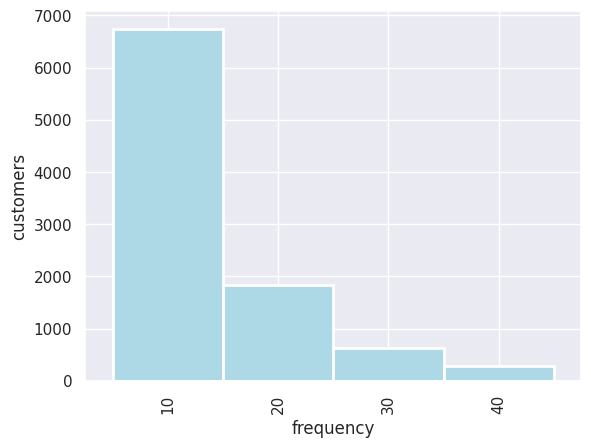

In [ ]:
""" Plot Number of customers per day """
db_conn = alchemyEngine.connect();
## Group user frequency
query = """
    SELECT freq, COUNT(*) AS value
    FROM (
        SELECT user_id, COUNT(*) AS freq
        FROM customers
        WHERE event_time between '2022-10-01' AND '2023-02-28'
            AND event_type = 'purchase'
        GROUP BY user_id
        ORDER BY freq ASC
    ) AS user_freq
    GROUP BY freq
    ORDER BY freq
"""
df = pd.read_sql(query, db_conn)
sns.set(style='darkgrid')
df.head()
df.describe()
baskets = [0, 10, 20, 30, 40]
labels = [10, 20, 30, 40]
df['range'] = pd.cut(df['freq'], bins=baskets, labels=labels, right=False)
dr = df.groupby('range', observed=True)['value'].mean()

dr.head(10)
ax = dr.plot(
    kind='bar',
    width=1,
    edgecolor='white',
    linewidth=2,
    xlabel='frequency',
    ylabel='customers',
    color='lightblue'
)
plt.show()

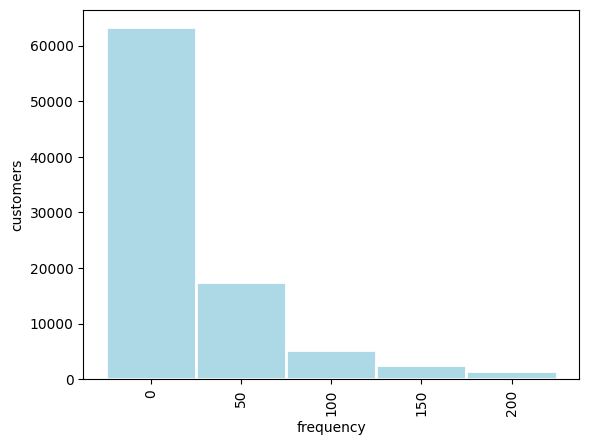

In [ ]:
""" Plot spend of customers per day """
db_conn = alchemyEngine.connect();
query = """
    SELECT user_id, SUM(price) AS sum
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY user_id
    ORDER BY sum ASC
"""

df = pd.read_sql(query, db_conn)
df.describe()
baskets = [0, 50, 100, 150, 200, 250]
labels = [0, 50, 100, 150, 200]

df['range'] = pd.cut(df['sum'], bins=baskets, labels=labels, right=False)
dr = df['range'].value_counts().sort_index()
ax = dr.plot(
    kind='bar',
    width=1,
    edgecolor='white',
    linewidth=2,
    xlabel='frequency',
    ylabel='customers',
    color='lightblue'
)
plt.show()